# Create Spotify Playlist with Machine Learning

We are given a data set of spotify songs with specific audio features. We want to create new playlists with songs that sound similar. For this, we use machine learning clustering algorithms.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
from yellowbrick.cluster import KElbowVisualizer
from itertools import permutations


In [17]:
df = pd.read_csv("audio_features.csv")
df.drop(["type","uri"], axis=1, inplace=True)
df.head()

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode
0,0.654,0.090,134.989,0.0369,0.25800,0.000014,4,0.528,11,211275,-5.394,0.181,0
1,0.725,0.101,96.970,0.0323,0.00201,0.000020,4,0.605,5,193293,-5.729,0.539,1
2,0.719,0.146,123.075,0.0390,0.06960,0.000000,4,0.545,11,195213,-5.424,0.196,0
3,0.589,0.209,106.085,0.0352,0.59500,0.000000,4,0.760,0,171800,-6.501,0.648,1
4,0.912,0.118,126.023,0.0377,0.02720,0.000443,4,0.727,8,179217,-3.594,0.671,0


## Tasks
- Choose 3 audio features that you want to base the playlist creation on
(i.e. 'energy', 'instrumentalness', 'loudness')
- Scale the data 
- Use the k-means method to compute clusters and use the elbow method to determine a good amount of clusters

If you see that the clustering does not work well (low amount of clusters, large dispersion, ...), consider choosing other audio features and test if it works better

In [5]:
# Choose features
features = ['danceability', 'energy', 'tempo']
df_features = df[features]

In [6]:
# Scale (MinMax Scaling of the features)
scaler = preprocessing.MinMaxScaler()
df_features_scaled = scaler.fit_transform(df_features)
df_features_scaled = pd.DataFrame(df_features_scaled, columns=features)
df_features_scaled.head()

,danceability,energy,tempo
0,0.488513,0.642027,0.541446
1,0.581620,0.717001,0.296748
2,0.509069,0.710665,0.464765
3,0.769045,0.573390,0.355414
4,0.729141,0.914467,0.483739


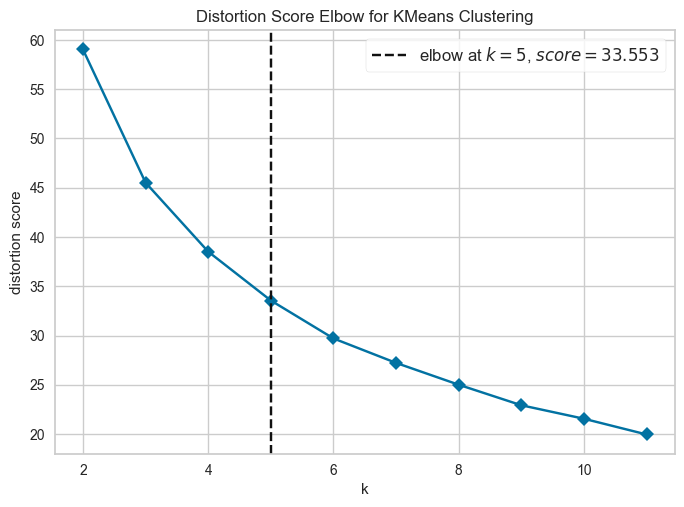

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
# Use k-means + elbow method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12),timings=False)
#show only line
visualizer.fit(df_features_scaled)
visualizer.show()




## Tasks
- Using the optimal amount of clusters, compute the clusters for all songs
- Plot the songs in a 3d space

In [8]:
# Compute clusters
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_features_scaled)
df_features_scaled['cluster'] = kmeans.labels_
df_features_scaled.head()

,danceability,energy,tempo,cluster
0,0.488513,0.642027,0.541446,2
1,0.581620,0.717001,0.296748,0
2,0.509069,0.710665,0.464765,0
3,0.769045,0.573390,0.355414,3
4,0.729141,0.914467,0.483739,0


In [9]:
import plotly.express as px
# 3D-plot 
fig = px.scatter_3d(df_features_scaled, x='danceability', y='energy', z='tempo', color='cluster')
fig.show()


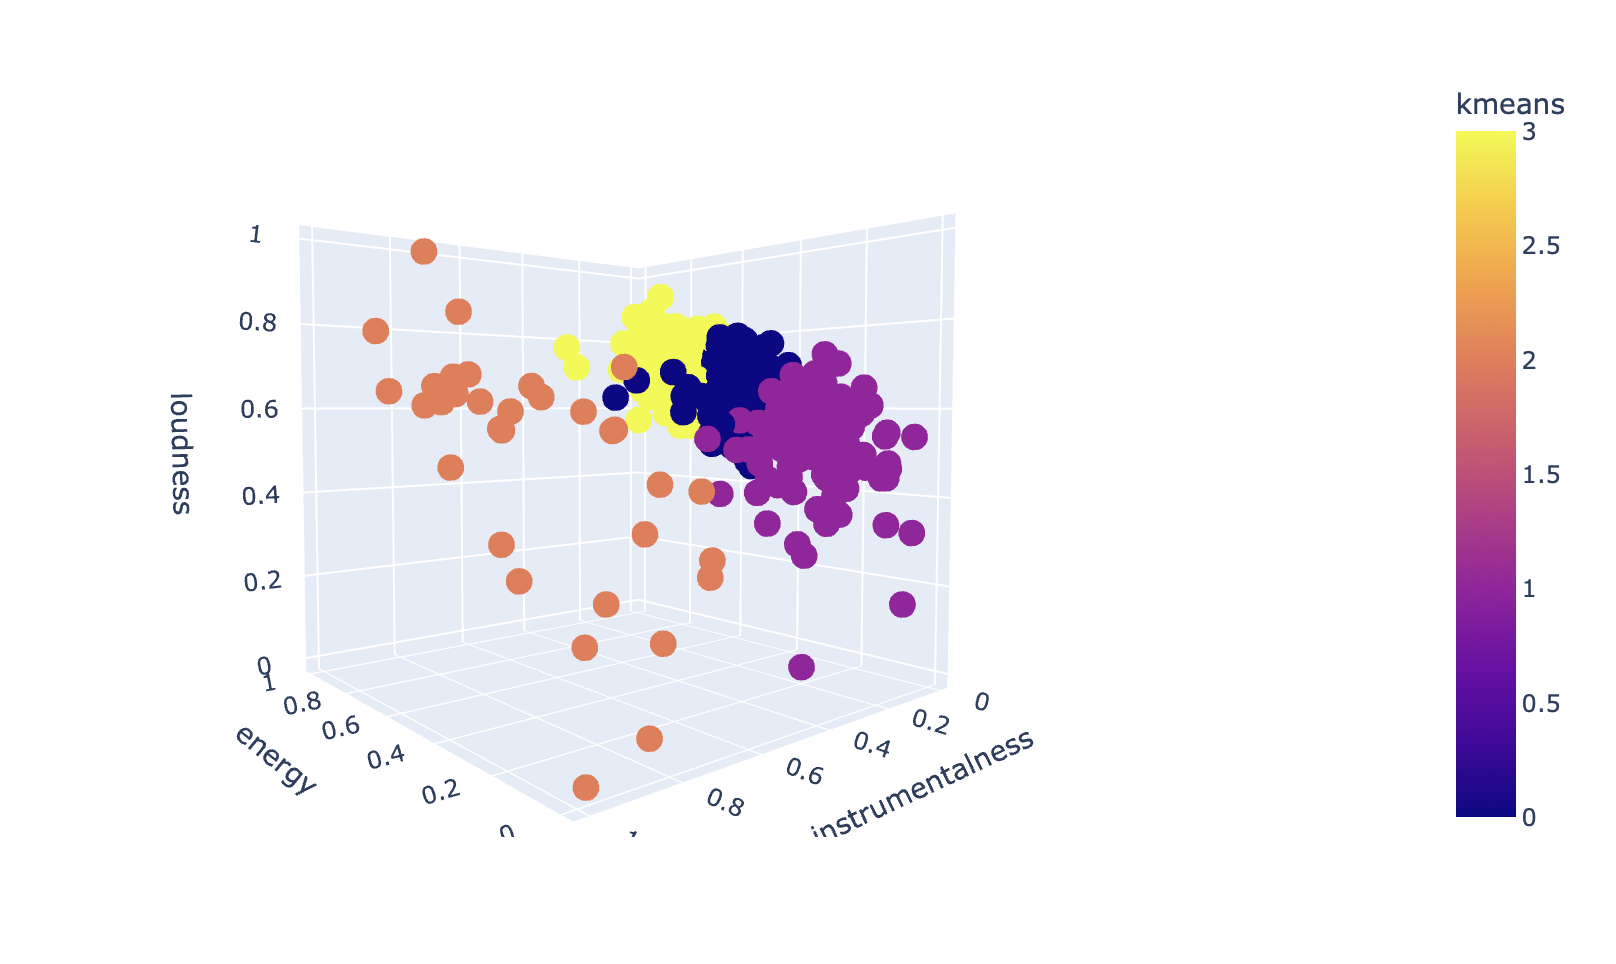

## Tasks
- For every cluster, plot the distribution of the audio features in the respective cluster

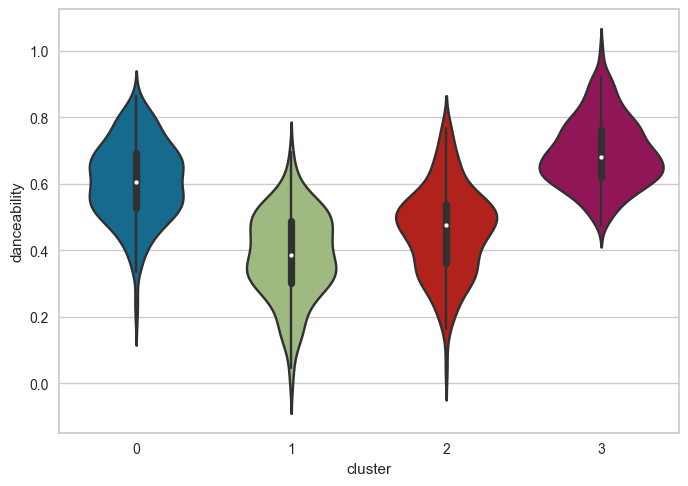

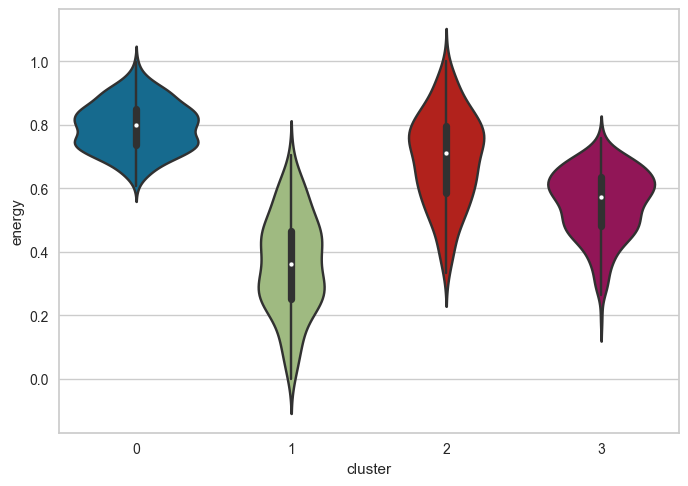

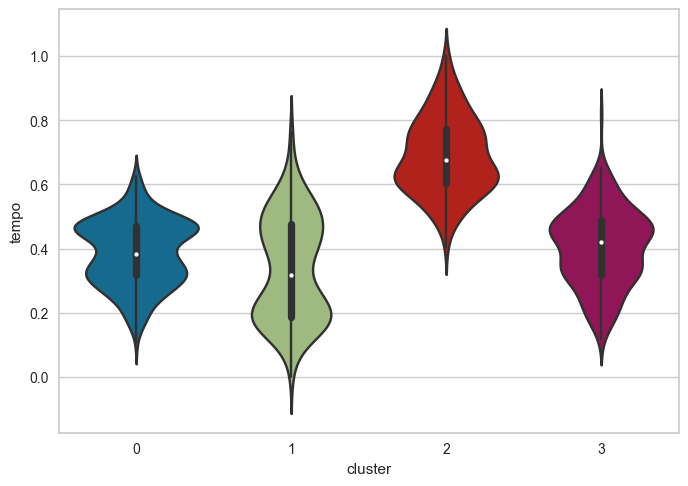

In [10]:
# violinplot for every cluster
for j in df_features_scaled.columns[:-1]:
    sns.violinplot(x=df_features_scaled['cluster'], y=df_features_scaled[j])
    plt.show()

## Advanced Task
At the beginning, we arbitrarily chose the features that our clusters are based on. Instead, we might be interested in finding out which features work best to build playlists (clusters).

We can use the Silhouette score for this reason. The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

### Compute the silhouette scores for all feature permutations and record the ones with the highest scores

In [21]:
# Compute the silhouette scores for all feature permutations and record the ones with the highest scores
features = df.columns
feature_permutations = list(permutations(features, 3))
best_score = 0
dict_perm_scores = {}
for i in feature_permutations:
    df_features = df[list(i)]
    scaler = preprocessing.MinMaxScaler()
    df_features_scaled = scaler.fit_transform(df_features)
    df_features_scaled = pd.DataFrame(df_features_scaled, columns=list(i))
    kmeans = KMeans(n_clusters=4, random_state=0).fit(df_features_scaled)
    df_features_scaled['cluster'] = kmeans.labels_
    score = silhouette_score(df_features_scaled, df_features_scaled['cluster'])
    dict_perm_scores[i] = score
    if score > best_score:
        best_score = score
        best_features = list(i)

In [ ]:
#score: 

In [24]:
dict_perm_scores

{('energy', 'liveness', 'tempo'): 0.769067768070411,
 ('energy', 'liveness', 'speechiness'): 0.8027831451747413,
 ('energy', 'liveness', 'acousticness'): 0.7831513265794788,
 ('energy', 'liveness', 'instrumentalness'): 0.8393081471505471,
 ('energy', 'liveness', 'time_signature'): 0.8384566915768312,
 ('energy', 'liveness', 'danceability'): 0.7752664414066007,
 ('energy', 'liveness', 'key'): 0.7315433546903175,
 ('energy', 'liveness', 'duration_ms'): 0.8182580920641314,
 ('energy', 'liveness', 'loudness'): 0.8276642986612571,
 ('energy', 'liveness', 'valence'): 0.7666859442079631,
 ('energy', 'liveness', 'mode'): 0.825522166562528,
 ('energy', 'tempo', 'liveness'): 0.7690677680704111,
 ('energy', 'tempo', 'speechiness'): 0.7827055617309485,
 ('energy', 'tempo', 'acousticness'): 0.7594173196036604,
 ('energy', 'tempo', 'instrumentalness'): 0.812212289740926,
 ('energy', 'tempo', 'time_signature'): 0.8137558525747636,
 ('energy', 'tempo', 'danceability'): 0.7643051145550986,
 ('energy', 

In [23]:
#vsiualize the best features
df_features = df[best_features]
scaler = preprocessing.MinMaxScaler()
df_features_scaled = scaler.fit_transform(df_features)
df_features_scaled = pd.DataFrame(df_features_scaled, columns=best_features)
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_features_scaled)
df_features_scaled['cluster'] = kmeans.labels_
fig = px.scatter_3d(df_features_scaled, x=best_features[0], y=best_features[1], z=best_features[2], color='cluster')
fig.show()